## Probability Distributions

Data plays a central role in various fields, including Data Science and Machine Learning Engineering. As time progresses, data has become increasingly crucial for making informed decisions and developing innovative products. In this assignment, you will work with data that follows different probability distributions.

## Sections

1. **Generating Data**: Learn how to generate data that follows specific probability distributions.

2. **Naive Bayes Classifier (Continuous)**: Implement a Naive Bayes classifier for continuous data generated in Section 1.

3. **Real-Life Problem (Spam Detection)**: Enhance the Naive Bayes implementation to address a real-life problem, specifically spam detection.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
import scipy
from scipy.special import erfinv, comb
from scipy.stats import uniform, binom, norm
from dataclasses import dataclass
from sklearn.metrics import accuracy_score

import utils

# Section 1: Generating Data from a Specific Distribution

Let's recap some concepts and formalize them to facilitate coding. Don't worry, you will be guided throughout the entire assignment!

A random variable $X$ is a function that represents a random phenomenon, meaning its exact value cannot be determined. However, probabilities can be assigned to a set of possible values it can take. For example, if $X$ has a uniform distribution on $[2, 4]$, we cannot determine the exact value of $X$, but we can say with a probability of $1$ that the value lies between $[2, 4]$. We can also say that:

$$\mathbf P(X \leq 3) = \frac{1}{2}$$

where $3$ is the midpoint of the interval $[2, 4]$. Therefore, you have learned that a continuous random variable is associated with a function called the probability density function (PDF), which encodes the probability of the random variable falling within a given range. In other words, if $X$ is a continuous random variable and $f$ is its PDF, then:

$$\mathbf P(a \leq X \leq b) = \text{Area under } f \text{ between } a \text{ and } b$$

In the discrete case, $\mathbf P(X = a) = f(a)$. In any case, $\mathbf P(-\infty < X < +\infty) = 1$ because a random variable takes values on real numbers, and you're covering all possible outcomes.

Another function associated with a random variable is the cumulative distribution function (CDF), denoted as $F$. It represents the probability that a random variable $X$ will be less than or equal to $x$, for any $x \in \mathbb{R}$:

$$F(x) := \mathbf P(X \leq x), \quad \forall x \in \mathbb{R}$$

The CDF is a non-decreasing function and approaches $1$ as $x$ approaches infinity because it represents a probability and must yield a value between $0$ and $1$.

In the lectures, you learned that if $X$ is a random variable with CDF $F$, then $F(X)$ follows a uniform distribution between $0$ and $1$. In other words, the new random variable $F(X)$ will be uniformly distributed between $0$ and $1$. This opens up the possibility of generating artificial data with any desired distribution, given that we know $F$. The process is as follows:

1. Generate a random value $y$ uniformly from the interval $[0, 1]$.
2. Compute $F^{-1}(y)$, which is the inverse function of $F$ evaluated at $y$.

It can be shown that if $Y$ follows a uniform distribution between $0$ and $1$, then the random variable $F^{-1}(Y)$ has the same distribution as $X$.

Therefore, by computing the inverse of $F$, you can generate artificial data from any known distribution! This is an incredibly powerful technique, isn't it?

So far in the course, you have encountered three common probability distributions:
- Uniform
- Gaussian
- Binomial

In the first part of this assignment, you will code a random generator for each of the above distributions!


## Exercise 1: Uniform Generator

The natural first step is to create a function capable of generating random data that comes from the uniform distribution. You will not be coding a [pseudo-random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (this is outside the scope of this assignment) but instead you will use a predefined function that handles this for you. If you are unsure where you can find such a function take a look at the [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.

In [ ]:
def uniform_generator(a, b, num_samples=100):
    """
    Generates an array of uniformly distributed random numbers within the specified range.

    Parameters:
    - a (float): The lower bound of the range.
    - b (float): The upper bound of the range.
    - num_samples (int): The number of samples to generate (default: 100).

    Returns:
    - array (ndarray): An array of random numbers sampled uniformly from the range [a, b).
    """

    np.random.seed(42)

    ### START CODE HERE ###
    array = np.random.uniform(a,b,num_samples)
    ### END CODE HERE ###

    return array

In [ ]:
# Test your function

print(f"6 randomly generated values between 0 and 1:\n{np.array2string(uniform_generator(0, 1, num_samples=6), precision=3)}\n")
print(f"3 randomly generated values between 20 and 55:\n{np.array2string(uniform_generator(20, 55, num_samples=3), precision=3)}\n")
print(f"1 randomly generated value between 0 and 100:\n{np.array2string(uniform_generator(0, 100, num_samples=1), precision=3)}")

6 randomly generated values between 0 and 1:
[0.375 0.951 0.732 0.599 0.156 0.156]

3 randomly generated values between 20 and 55:
[33.109 53.275 45.62 ]

1 randomly generated value between 0 and 100:
[37.454]


##### __Expected Output__

```
6 randomly generated values between 0 and 1:
[0.375 0.951 0.732 0.599 0.156 0.156]

3 randomly generated values between 20 and 55:
[33.109 53.275 45.62 ]

1 randomly generated value between 0 and 100:
[37.454]
```

## Exercise 2:  Gaussian Generator

With your uniform data generator ready you can go ahead and create generators for the other distributions. In order to do this you will need the inverse `CDF` for the distribution you wish to create data for.

### 2.1 Inverse CDF - Gaussian

Let's start with a Normal Distribution generator. In the case of the Gaussian distribution finding the inverse is a bit challenging because the CDF doesn't have a closed analytical expression.

The closed formula uses a function called the Gaussian error function, denoted as $\text{erf}(x)$. However, you don't need to implement it or its inverse for this assignment. These functions are important in statistics, and there are many libraries available that provide their implementations.

For instance, you can use [scipy.special.erf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) and [scipy.special.erfinv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfinv.html#scipy.special.erfinv) to compute the erf function and its inverse. Alternatively, you can find an implementation of the erf function in [math.erf](https://docs.python.org/3/library/math.html#math.erf) from the Python math library.

If $X \sim N(\mu, \sigma)$, then the CDF $F(x)$ can be expressed as:

$$y = F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right].$$

With some simple calculations and denoting ${\text{erf}}^{-1}$ as the inverse of the $\text{erf}$ function, it can be shown that:

$$x = F^{-1}(y) = \sigma \sqrt{2} \cdot \text{erf}^{-1}(2y - 1) + \mu.$$


In [ ]:
def inverse_cdf_gaussian(y, mu, sigma):
    """
    Calculates the inverse cumulative distribution function (CDF) of a Gaussian distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - mu (float): The mean of the Gaussian distribution.
    - sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the Gaussian distribution that correspond to the given probability/ies.
    """
    ### START CODE HERE ###
    x = mu + scipy.special.erfinv(2 * y - 1) * sigma*(2**0.5)
    ### END CODE HERE ###

    return x

In [ ]:
# Test your function

print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1e-10}: {inverse_cdf_gaussian(1e-10, 15, 5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {0}: {inverse_cdf_gaussian(0, 15, 5)}")
print(f"Inverse of Gaussian CDF with mu {20} and sigma {0.5} for value {0.4}: {inverse_cdf_gaussian(0.4, 20, 0.5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1}: {inverse_cdf_gaussian(1, 15, 5)}")

Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf
Inverse of Gaussian CDF with mu 20 and sigma 0.5 for value 0.4: 19.873
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf


##### __Expected Output__

```
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf
Inverse of Gaussian CDF with mu 20 and sigma 0.5 for value 0.4: 19.873
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf
```

### 2.2 Gaussian Generator

Now that you have all the necessary information, you can create a generator for data that follows a Gaussian distribution with a specified $\mu$ and $\sigma$. Similar to the generator for uniformly distributed data, the `gaussian_generator` function should allow you to specify the number of samples to generate. **Make sure to utilize the functions you have defined earlier in the assignment.**

In [ ]:
def gaussian_generator(mu, sigma, num_samples):
    ### START CODE HERE ###

    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = uniform_generator(0,1,num_samples)

    # Use the uniform-distributed sample to generate Gaussian-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = inverse_cdf_gaussian(u, mu, sigma)
    ### END CODE HERE ###

    return array

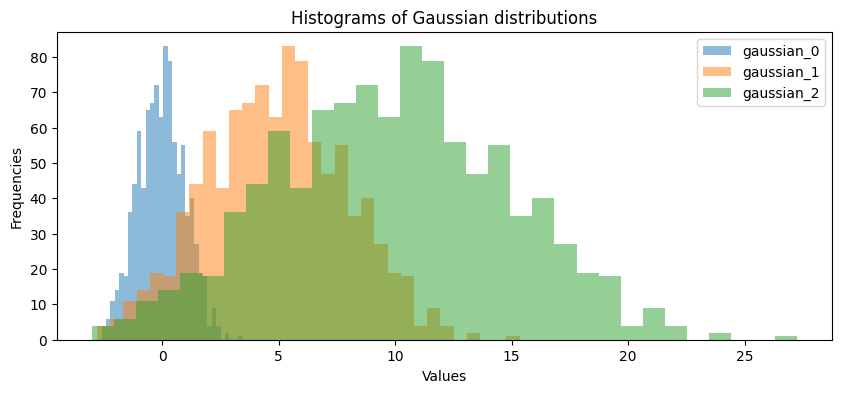

In [ ]:
# Test your function

gaussian_0 = gaussian_generator(0, 1, 1000)
gaussian_1 = gaussian_generator(5, 3, 1000)
gaussian_2 = gaussian_generator(10, 5, 1000)

utils.plot_gaussian_distributions(gaussian_0, gaussian_1, gaussian_2)

##### __Expected Output__

<img src="./assets/gaussian.png" style="height: 300px;"/>


## Exercise 3: Binomial Generator

### 3.1 Inverse CDF - Binomial

If $X \sim \text{Binomial}(n,p)$, then its PMF is given by:

$$P(X = k) = {n \choose k}p^{k}(1-p)^{n-k}.$$

Therefore, if $0 \leq x \leq n$, its CDF is given by:

$$F(x) = P(X \leq x) = P(X = 0) + P(X = 1) + \ldots + P(X = \lfloor x \rfloor) = \sum_{k=0}^{\lfloor x \rfloor} {n \choose k}p^{k}(1-p)^{n-k}.$$

Here, $\lfloor x \rfloor$ denotes the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), which returns the greatest integer less than or equal to $x$. For example, $\lfloor 2.9 \rfloor = 2$ and $\lfloor 1.2 \rfloor = 1$. This function is necessary because the domain of $F$ is the entire set of real numbers, but $P(X = k)$ is non-zero only for positive integer values between 0 and $n$

If $x > n$, then $F(x) = 1$. It is important to note that the expression for $F(x)$ can become complex and messy, and there is no closed-form expression for the inverse function $F^{-1}$ in this case. However, statistical libraries provide implementations of the inverse CDF using [generalized quantile functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Inverse_distribution_function_.28quantile_function.29). You can refer to [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) for an example of a library that implements these functions. In particular, the `scipy.stats.binom.ppf` function is what you need. Since the `binom` class is already imported, you can use `help(binom)` to explore its parameters and functions. The function you will need is located in the "Methods" section: `ppf`.


In [ ]:
def inverse_cdf_binomial(y, n, p):
    """
    Calculates the inverse cumulative distribution function (CDF) of a binomial distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - n (int): The number of trials in the binomial distribution.
    - p (float): The probability of success in each trial.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the binomial distribution that correspond to the given probability/ies.
    """

    ### START CODE HERE ###
    x = binom.ppf(y, n, p)
    ### END CODE HERE ###

    return x

In [ ]:
# Test your function

print(f"Inverse of Binomial CDF with n {15} and p {0.9} for value {1e-10}: {inverse_cdf_binomial(1e-10, 15, 0.9):.3f}")
print(f"Inverse of Binomial CDF with n {15} and p {0.5} for value {0}: {inverse_cdf_binomial(0, 15, 0.5)}")
print(f"Inverse of Binomial CDF with n {20} and p {0.2} for value {0.4}: {inverse_cdf_binomial(0.4, 20, 0.2):.3f}")
print(f"Inverse of Binomial CDF with n {15} and p {0.5} for value {1}: {inverse_cdf_binomial(1, 15, 0.5)}")

Inverse of Binomial CDF with n 15 and p 0.9 for value 1e-10: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 0: -1.0
Inverse of Binomial CDF with n 20 and p 0.2 for value 0.4: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 1: 15.0


##### __Expected Output__

```
Inverse of Binomial CDF with n 15 and p 0.9 for value 1e-10: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 0: -1.0
Inverse of Binomial CDF with n 20 and p 0.2 for value 0.4: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 1: 15.0
```

### 3.2 Binomial Generator


In [ ]:
def binomial_generator(n, p, num_samples):
    """
    Generates an array of binomially distributed random numbers.

    Args:
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success in each trial.
        num_samples (int): The number of samples to generate.

    Returns:
        array: An array of binomially distributed random numbers.
    """
    ### START CODE HERE ###

    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = uniform_generator(0,1,num_samples)

    # Use the uniform-distributed sample to generate binomial-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = inverse_cdf_binomial(u, n ,p)
    ### END CODE HERE ###

    return array

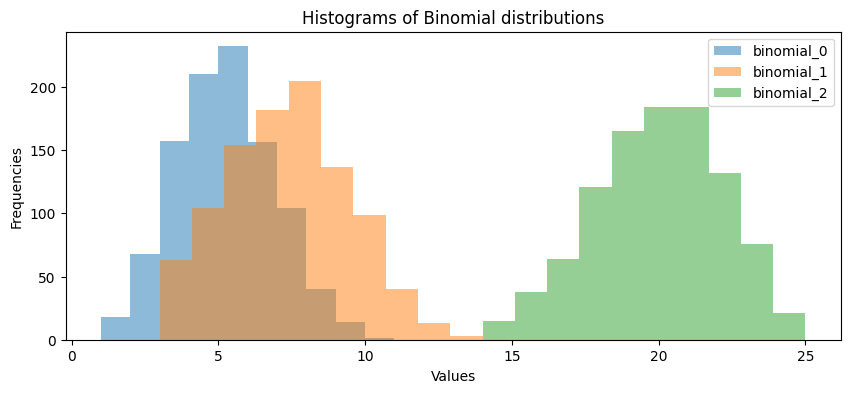

In [ ]:
# Test your function

binomial_0 = binomial_generator(12, 0.4, 1000)
binomial_1 = binomial_generator(15, 0.5, 1000)
binomial_2 = binomial_generator(25, 0.8, 1000)

utils.plot_binomial_distributions(binomial_0, binomial_1, binomial_2)

##### __Expected Output__

<img src="./assets/binomial2.png" style="height: 300px;"/>


# Section 2: Building a Dog Breed Classifier using Naive Bayes

Data generated from simulations plays an important role in Machine Learning to train and evaluate models. In this section, you will simulate a synthetic dataset containing information about three different dog breeds. Each of them will have four features following various distributions, and you will use the corresponding generator functions for each of them. Then you will build and test a simple Naive Bayes classified to predict the breed from the features.

## Section 2.1: Generating the Dataset

In this section, we will generate a dataset that consists of four features for each dog:

- `height` in centimeters, which follows a Gaussian distribution.
- `weight` in kilograms, which follows a Gaussian distribution.
- `bark_days`, representing the number of days (out of 30) that the dog barks. It follows a Binomial distribution with `n = 30`.
- `ear_head_ratio`, which is the ratio between the length of the ears and the length of the head. It follows a Uniform distribution.


In [ ]:
FEATURES = ["height", "weight", "bark_days", "ear_head_ratio"]

You will generate synthetic data using the generator functions defined earlier to create a diverse and representative dataset for our dog breed classification problem.

In order to avoid a dependency between section 1 and this one, a pre-loaded version of the dataset is available. If you implemented all of the graded functions in section 1 correctly then the resulting dataset should be equal to the pre-loaded one. But in case something went off you can savely work on section 2:

In [ ]:
# Read the pre-loaded dataset
pre_loaded_df = pd.read_pickle("df_all_breeds.pkl")

try:
    # Generate the dataset using the graded functions from section 1
    df_all_breeds = utils.generate_data(gaussian_generator, binomial_generator, uniform_generator)
except:
    # In case of an error
    print("There was an error when generating the dataset using the generator functions.\n\nFalling back to the pre-loaded one.")
    df_all_breeds = pre_loaded_df
else:
    # In case that the generated dataset does not match the pre-loaded one
    if not df_all_breeds.equals(pre_loaded_df):
        print("The dataset generated from the generator functions is not identical to the expect one.\n\nFalling back to the pre-loaded one.")
        df_all_breeds = pre_loaded_df


# Print the first 10 rows of the dataframe
df_all_breeds.head(10)

The dataset generated from the generator functions is not identical to the expect one.

Falling back to the pre-loaded one.


,height,weight,bark_days,ear_head_ratio,breed
2836,39.697810,31.740980,9.0,0.193120,2
1002,36.710641,21.140427,26.0,0.163527,0
1075,34.726930,19.817954,24.0,0.386113,0
1583,32.324884,30.812210,18.0,0.463242,1
248,37.691499,21.794333,28.0,0.118190,0
814,36.688852,21.125901,26.0,0.165052,0
1407,30.844078,27.110196,16.0,0.399051,1
3376,38.616784,30.814387,8.0,0.169269,2
2700,44.655532,35.990456,12.0,0.281653,2
533,35.209095,20.139397,24.0,0.322284,0


from matplotlib import pyplot as plt
_df_0['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bark_days'].plot(kind='hist', bins=20, title='bark_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ear_head_ratio'].plot(kind='hist', bins=20, title='ear_head_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='height', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='weight', y='bark_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bark_days', y='ear_head_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ear_head_ratio', y='breed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['height'].plot(kind='line', figsize=(8, 4), title='height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bark_days'].plot(kind='line', figsize=(8, 4), title='bark_days')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ear_head_ratio'].plot(kind='line', figsize=(8, 4), title='ear_head_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['bark_days'].plot(kind='hist', bins=20, title='bark_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='index', y='height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='height', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='weight', y='bark_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='bark_days', y='ear_head_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['height'].plot(kind='line', figsize=(8, 4), title='height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['bark_days'].plot(kind='line', figsize=(8, 4), title='bark_days')
plt.gca().spines[['top', 'right']].set_visible(False)

All that is left is to divide the generated dataset into training and testing splits. You will use the 70% of the data for training and the remaining 30% for testing:

In [ ]:
# Define a 70/30 training/testing split
split = int(len(df_all_breeds)*0.7)

# Do the split
df_train = df_all_breeds[:split].reset_index(drop=True)
df_test = df_all_breeds[split:].reset_index(drop=True)

## Section 2.2 Brief Recap on Naive Bayes Algorithm

Let's recap how the Naive Bayes algorithm works and formalize the notation.

Let $X$ be a set of training data. An element $x \in X$ is a vector in the form $x = (x_1, x_2, \ldots, x_n)$, where $n$ is the number of attributes of each sample. For instance, $X$ can be a set of 100 dog breeds, and each dog breed might have 4 attributes, such as ear head ratio, number of days it barks in the month,  weight, and height. So, $X = \{ \text{dog}_1, \text{dog}_2, \ldots, \text{dog}_{100} \}$, and each dog breed, for instance, dog 5, will be represented as a 4-dimensional vector: $\text{dog}_5 = (\text{ear head ratio}_{\text{dog}_5}, \text{bark days}_{\text{dog}_5}, \text{weight}_{\text{dog}_5}, \text{height}_{\text{dog}_5})$.

Suppose that there are $m$ classes $C_1, C_2, \ldots, C_m$. Using the same example above, suppose there are $m = 3$ different types of dog breeds in the training data. The idea is to predict the class of a sample $x \in X$ by looking at its attributes. Naive Bayes does so by computing the posterior probabilities of a sample belonging to class $C_i$, i.e., it computes

$$\mathbf P(C_i \mid x), \quad i = 1, \ldots, m.$$

The predicted class is the $C_i$ with the highest probability. More formally, considering the set of every posterior probability of a given sample, what Naive Bayes computes is:

$$\text{predicted class for } x = \arg \max \left\{ \mathbf P(C_1 \mid x), \mathbf P(C_2 \mid x), \ldots, \mathbf P(C_m \mid x) \right\}$$

So, if the highest value is $\mathbf P(C_2 \mid x)$, then $\arg \max \left\{\mathbf  P(C_1 \mid x), \mathbf P(C_2 \mid x), \ldots, \mathbf P(C_m \mid x) \right\} = 2$.

To compute the posterior probability $\mathbf P(C_i \mid x)$, use the Bayes' Theorem:

$$\mathbf P(C_i \mid x) = \frac{\mathbf P(x \mid C_i)\mathbf P(C_i)}{\mathbf P(x)}.$$

In this equation we use $\mathbf P(x \mid C_i)$ generically to indicate the distriution of $X|C_i$. If $X$ is a contiuous random variable, $\mathbf P(x|C_i)$ should be interpreted as $f_{X|C_i}(x)$. Note that $\mathbf P(x)$ is positive and constant for every class $C_i$, therefore, to maximize $\mathbf P(C_i \mid x)$, it is sufficient to maximize $\mathbf P(x \mid C_i)\mathbf P(C_i)$. The probabilities $\mathbf P(C_i)$ are called the class prior probabilities, and they denote how likely a random sample from $X$ (without knowing any of its attributes) is to belong to each class. This value is usually not known and can be estimated from the training set by computing the proportion of each class in the training set. If the training set is too small, it is common to assume that each class is equally likely, i.e., $\mathbf P(C_1) = \mathbf P(C_2) = \ldots = \mathbf P(C_m)$, thus only maximizing $\mathbf P(x \mid C_i)$ remains. You will work here with the case when the prior probabilities will be estimated from the training set.

In general, it would be computationally expensive to compute $\mathbf P(x \mid C_i)$ for each $x$ and each class, this is why a **naive** assumption of **class-conditional independence** is made. This assumption states that each attribute is independent of each other attribute within each class. It is a strong assumption. For example, in our dog breed example, it would mean that for a specific type of dog breed, there is no correlation between its weight, height, and ear head ratio.

Assuming class-conditional independence, for an $x = (x_1, \ldots x_n)$ in $X$:

$$\mathbf P(x \mid C_i) = \mathbf P(x_1 \mid C_i) \cdot \mathbf P(x_2 \mid C_i) \cdot \ldots \cdot \mathbf P(x_n \mid C_i) = \prod_{k = 1}^{n} \mathbf P(x_k \mid C_i).$$

The probabilities $\mathbf P(x_k \mid C_i)$ can be estimated from the training data. The computation of $\mathbf P(x_k \mid C_i)$ depends on whether $x_k$ is categorical or not.

- If $x_k$ is categorical, then $\mathbf P(x_k \mid C_i)$ is the number of samples in $X$ that have attribute $x_k$ divided by the number of samples in class $C_i$.

- If $x_k$ is continuous-valued or discrete-valued, we need to make an assumption about its distribution and estimate its parameters using the training data. For instance, if $x_k$ is continuous-valued, we can assume that $\mathbf P(x_k \mid C_i)$ follows a Gaussian distribution with parameters $\mu_{C_i}$ and $\sigma_{C_i}$. Therefore, we need to estimate $\mu$ and $\sigma$ from the training data, and then $\mathbf P(x_k \mid C_i) = \text{PDF}_{\text{gaussian}}(x_k, \mu_{C_i}, \sigma_{C_i})$.

## Exercise 4: PDF for Distributions

To calculate the probabilities of predicting each class using Naive Bayes, you need to compute the prior probabilities. Although you already know the prior for each feature, you still need a way to compute the probability. In the next exercise, you are required to write a function that takes a value `x` and the relevant parameters and returns the value of the Probability Density Function (`PDF`) for each distribution.

You can choose to implement this function on your own or utilize the implementation from the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module.

### 4.1 Uniform PDF

If $X \sim \text{Uniform}(a,b)$, then the PDF for $X$ is given by:


$$f_X(x) =
\begin{cases}
\frac{1}{b-a}, \quad \text{if } x \in [a,b]. \\
0, \quad \text{otherwise.}
\end{cases}
$$

In [ ]:
def pdf_uniform(x, a, b):
    """
    Calculates the probability density function (PDF) for a uniform distribution between 'a' and 'b' at a given point 'x'.

    Args:
        x (float): The value at which the PDF is evaluated.
        a (float): The lower bound of the uniform distribution.
        b (float): The upper bound of the uniform distribution.

    Returns:
        float: The PDF value at the given point 'x'. Returns 0 if 'x' is outside the range [a, b].
    """
    ### START CODE HERE ###
    pdf = (0) if (x < a or x > b) else 1/(b-a)
    ### END CODE HERE ###

    return pdf

In [ ]:
# Test your function

print(f"Uniform PDF with a={0} and b={5} for value {1e-10}: {pdf_uniform(1e-10, 0, 5):.3f}")
print(f"Uniform PDF with a={20} and b={25} for value {5}: {pdf_uniform(5, 20, 25):.3f}")
print(f"Uniform PDF with a={2} and b={10} for value {5.4}: {pdf_uniform(5.4, 2, 10):.3f}")
print(f"Uniform PDF with a={35} and b={60} for value {42}: {pdf_uniform(42, 35, 60):.3f}")

Uniform PDF with a=0 and b=5 for value 1e-10: 0.200
Uniform PDF with a=20 and b=25 for value 5: 0.000
Uniform PDF with a=2 and b=10 for value 5.4: 0.125
Uniform PDF with a=35 and b=60 for value 42: 0.040


##### __Expected Output__

```
Uniform PDF with a=0 and b=5 for value 1e-10: 0.200
Uniform PDF with a=20 and b=25 for value 5: 0.000
Uniform PDF with a=2 and b=10 for value 5.4: 0.125
```

### 4.2 Gaussian PDF

You will need to implement the PDF for the Gaussian Distribution. The PDF for $X$ if $X \sim \text{Normal}(\mu,\sigma^2)$ is given by:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

In [ ]:
def pdf_gaussian(x, mu, sigma):
    """
    Calculate the probability density function (PDF) of a Gaussian distribution at a given value.

    Args:
        x (float or array-like): The value(s) at which to evaluate the PDF.
        mu (float): The mean of the Gaussian distribution.
        sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
        float or ndarray: The PDF value(s) at the given point(s) x.
    """

    ### START CODE HERE ###
    coefficient = 1.0 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    pdf = coefficient * np.exp(exponent)
    ### END CODE HERE ###

    return pdf

In [ ]:
# Test your function

print(f"Gaussian PDF with mu={15} and sigma={5} for value {10}: {pdf_gaussian(10, 15, 5):.3f}")
print(f"Gaussian PDF with mu={15} and sigma={5} for value {0}: {pdf_gaussian(0, 15, 5):.3f}")
print(f"Gaussian PDF with mu={20} and sigma={0.5} for value {20}: {pdf_gaussian(20, 20, 0.5):.3f}")
print(f"Gaussian PDF with mu={15} and sigma={5} for value {1}: {pdf_gaussian(1, 15, 5):.3f}")

Gaussian PDF with mu=15 and sigma=5 for value 10: 0.048
Gaussian PDF with mu=15 and sigma=5 for value 0: 0.001
Gaussian PDF with mu=20 and sigma=0.5 for value 20: 0.798
Gaussian PDF with mu=15 and sigma=5 for value 1: 0.002


##### __Expected Output__

```
Gaussian PDF with mu=15 and sigma=5 for value 10: 0.048
Gaussian PDF with mu=15 and sigma=5 for value 0: 0.001
Gaussian PDF with mu=20 and sigma=0.5 for value 20: 0.798
Gaussian PDF with mu=15 and sigma=5 for value 1: 0.002
```

### 4.3 Binomial Probability Mass Function (PMF)

For the binomial distribution, since it is a discrete distribution, we will be using the Probability Mass Function (PMF) instead of the Probability Density Function (PDF).

Remember that if we have a random variable X following a binomial distribution with parameters n and p, its PMF is given by:
$$p_X(x) = {n \choose x}  p^x  (1-p)^{n-x},\quad x=0,1,2,\ldots, n$$

Here, you can calculate the combination ${n \choose x}$ using either the definition: ${n \choose x} = \frac{n!}{x!(n-x)!}$, utilizing the `math.factorial` function, or you can use the `scipy.special.comb` function to obtain the combination. You can also refer to the `binom` documentation to find any other relevant functions that may assist you.

In [ ]:
def pmf_binomial(x, n, p):
    """
    Calculate the probability mass function (PMF) of a binomial distribution at a specific value.

    Args:
        x (int): The value at which to evaluate the PMF.
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success for each trial.

    Returns:
        float: The probability mass function (PMF) of the binomial distribution at the specified value.
    """

    ### START CODE HERE ###
    pmf = binom.pmf(x, n, p)
    ### END CODE HERE ###

    return pmf

In [ ]:
# Test your function

print(f"Binomial PMF with n={15} and p={0.9} for value {15}: {pmf_binomial(15, 15, 0.9):.3f}")
print(f"Binomial PMF with n={30} and p={0.5} for value {15}: {pmf_binomial(15, 30, 0.5):.3f}")
print(f"Binomial PMF with n={20} and p={0.9} for value {15}: {pmf_binomial(15, 20, 0.9):.3f}")
print(f"Binomial PMF with n={15} and p={0.5} for value {20}: {pmf_binomial(20, 15, 0.5):.3f}")

Binomial PMF with n=15 and p=0.9 for value 15: 0.206
Binomial PMF with n=30 and p=0.5 for value 15: 0.144
Binomial PMF with n=20 and p=0.9 for value 15: 0.032
Binomial PMF with n=15 and p=0.5 for value 20: 0.000


##### __Expected Output__

```
Binomial PMF with n=15 and p=0.9 for value 15: 0.206
Binomial PMF with n=30 and p=0.5 for value 15: 0.144
Binomial PMF with n=20 and p=0.9 for value 15: 0.032
Binomial PMF with n=15 and p=0.5 for value 20: 0.000
```

## 2.3 Estimated Parameters

Now that you have the `PDF`s ready you need a way of estimating the parameters of the distributions for the features in the training split, this translates to estimating:

- `mu` and `sigma` for the `height` feature
- `mu` and `sigma` for the `weight` feature
- `n` and `p` for the `bark_days` feature
- `a` and `b` for the `ear_head_ratio` feature


Since the interpretation and way of computing these parameters has not been covered in the lectures, the assignment provides functions that can accomplish this for you (**you don't need to use them in any of your code but it is good that you are aware what is going on under the hood**). These have already been imported into this environment and are called:

- `estimate_gaussian_params`
- `estimate_binomial_params`
- `estimate_uniform_params`

All of these functions work in the same way. They expect an array of numbers (a numpy array, a pandas series or a regular python list) and will return the relevant parameters depending on the distribution selected. An example of how to use these functions can be seen by running the following cell:

In [ ]:
m, s = utils.estimate_gaussian_params(np.array([26.31, 32.45, 14.99]))
print(f"Gaussian:\nmu = {m:.3f} and sigma = {s:.3f} for sample: {np.array([26.31, 32.45, 14.99])}\n")

n, p = utils.estimate_binomial_params(np.array([9, 26, 18, 14, 5]))
print(f"Binomial:\nn = {n} and p = {p:.3f} for sample: {np.array([9, 26, 18, 14, 5])}\n")

a, b = utils.estimate_uniform_params(np.array([0.9, 0.26, 0.18, 0.07, 0.5]))
print(f"Uniform:\na = {a:.3f} and b = {b:.3f} for sample: {np.array([0.9, 0.26, 0.18, 0.07, 0.5])}")

Gaussian:
mu = 24.583 and sigma = 7.232 for sample: [26.31 32.45 14.99]

Binomial:
n = 30 and p = 0.480 for sample: [ 9 26 18 14  5]

Uniform:
a = 0.070 and b = 0.900 for sample: [0.9  0.26 0.18 0.07 0.5 ]


By using these functions on every corresponding feature of the training set, the training parameters can be estimated. The next cell will perform this operation and save these parameters in the `train_params` variable, which is a dictionary with the following structure:

```
{breed: {feature_1: {param_1: value, param_2: value},
         feature_2: {param_1: value, param_2: value},
         ...  
}
```

In [ ]:
# Compute the estimated parameters from the training dataset
train_params = utils.compute_training_params(df_train, FEATURES)

# Print the parameters dictionary with rounded values - this is just for prettier visualizations
utils.round_dict(train_params)

{0: {'height': {'mu': 35.03, 'sigma': 1.518},
  'weight': {'mu': 20.02, 'sigma': 1.012},
  'bark_days': {'n': 30, 'p': 0.801},
  'ear_head_ratio': {'a': 0.1, 'b': 0.597}},
 1: {'height': {'mu': 29.971, 'sigma': 2.01},
  'weight': {'mu': 24.927, 'sigma': 5.025},
  'bark_days': {'n': 30, 'p': 0.498},
  'ear_head_ratio': {'a': 0.201, 'b': 0.5}},
 2: {'height': {'mu': 39.814, 'sigma': 3.572},
  'weight': {'mu': 31.841, 'sigma': 3.061},
  'bark_days': {'n': 30, 'p': 0.296},
  'ear_head_ratio': {'a': 0.101, 'b': 0.3}}}

To get any estimated parameter out of this dictionary you use the syntax `train_params[breed][feature][parameter]`

Check two examples of this in the following cell:

In [ ]:
# Get the estimated value of n for the feature bark_days for the breed 0
estimated_param = train_params[0]['bark_days']['n']
print(f"estimated value of n for the feature bark_days for the breed 0: {estimated_param}\n")

# Get the estimated value of sigma for the feature height for the breed 2
estimated_param = train_params[2]['height']['sigma']
print(f"estimated value of sigma for the feature height for the breed 2: {estimated_param:.3f}")

estimated value of n for the feature bark_days for the breed 0: 30

estimated value of sigma for the feature height for the breed 2: 3.572


## Exercise 5: Computing the probability of each class

Now you have the estimated parameters for every feature you need to compute the probability belonging to each class which is analogous to the proportion in which every class appears in the training set. For this complete the `compute_breed_proportions` function below. This function should return a dictionary that includes the proportion of data belonging to each breed. Notice that all values should sum up to 1. You can use Python's built-in `round` function to avoid very long floats but this is up to you and your grade will not be affected by this. This dict should look like this:

```
{0: 0.25, 1: 0.5, 2: 0.25}    
```

Notice that the keys of this dictionary are integers while the values are floating point numbers.

In [ ]:
def compute_breed_proportions(df):
    """
    Computes the estimated probabilities of each breed.

    Args:
        df (pandas.DataFrame): The dataframe containing the training data.

    Returns:
        - probs_dict (dict): A dictionary that contains the proportion of data belonging to each breed.
    """

    probs_dict = {}

    ### START CODE HERE ###

    # Loop over the breeds
    #for None in None:
    for breed in df_train["breed"]:

        # Slice the original df to only include data for the current breed
        # You can use the syntax df[df['breed'] == group] replacing group with the corresponding variable
        #df_breed = df[df["breed"] == None]
        df_breed = df_train[df_train["breed"] == breed]#[train_params]
        # train_params = utils.compute_training_params(df_train, FEATURES)

        # Compute the probability of each class (breed)
        # You can get the number of rows in a dataframe by using len(dataframe)
        #prob_class = None/None
        prob_class = len(df_breed)/len(df)

        # Save the probability of each class (breed) in the probabilities dict rouding to 3 decimal places
        probs_dict[breed] = round(prob_class, 3)

    ### END CODE HERE ###

    return probs_dict

In [ ]:
# Test your function

train_class_probs = compute_breed_proportions(df_train)

print(f"Probability of each class for training split:\n\n{train_class_probs}")

Probability of each class for training split:

{2: 0.26, 0: 0.346, 1: 0.393}


##### __Expected Output__

```
Probability of each class for training split:

{0: 0.346, 1: 0.393, 2: 0.26}
```

## Exercise 6: Compute the Probability of X given the Breed -> $P(x \mid C_{i})$

To code a Naive Bayes classifier, you will assume **class-conditional independence** for a given $\boldsymbol x = (x_1, \ldots, x_n)$ in $\boldsymbol X$. With this assumption, you can compute the probability of $x$ given the class using the following expression:

$$\mathbf P(\boldsymbol x \mid C_{i}) = \mathbf P(x_1 \mid C_i) \cdot \mathbf P(x_2 \mid C_i) \cdot \ldots \cdot \mathbf P(x_n \mid C_i) = \prod_{k = 1}^{n} \mathbf P(x_k \mid C_i).$$

The probabilities $\mathbf P(x_k \mid C_i)$ can be estimated from the training tuples.

If $x_k$ is continuous-valued or discrete-valued, you need to make an assumption about its distribution and estimate its parameters using the training set. For example, if $x_k$ is continuous-valued, it is often assumed that $\mathbf P(x_k \mid C_i)$ follows a Gaussian distribution with parameters $\mu_{C_i}$ and $\sigma_{C_i}$. Therefore, you need to estimate $\mu$ and $\sigma$ from the training set, and then $\mathbf P(x_k \mid C_i) = \text{PDF}_{\text{gaussian}}(x_k,\mu_{C_i},\sigma_{C_i})$.

In this case, you already know the true distributions for every feature, so you just need to compute the appropriate `PDF` for each feature by passing the estimated parameters of that feature to the corresponding `PDF` computation function.

Complete the `prob_of_X_given_C` function below. This function takes the following parameters:
- `X`: a list containing the values for the features in the `features` parameter (the order matters)
- `features`: the names of the features being passed
- `breed`: the breed that will be assumed for the `X` observation
- `params_dict`: the dictionary containing the estimated parameters from the training split

The function should return the probability of the values of `X` given the selected `breed`.


In [ ]:
def prob_of_X_given_C(X, features, breed, params_dict):
    """
    Calculate the conditional probability of X given a specific breed, using the given features and parameters.

    Args:
        X (list): List of feature values for which the probability needs to be calculated.
        features (list): List of feature names corresponding to the feature values in X.
        breed (int): The breed for which the probability is calculated.
        params_dict (dict): Dictionary containing the parameters for different breeds and features.

    Returns:
        float: The conditional probability of X given the specified breed.
    """

    if len(X) != len(features):
        print("X and list of features should have the same length")
        return 0

    probability = 1.0
    #probability_f = 1.0

    ### START CODE HERE ###

    for feature_val, feature_name in zip(X, features):

        # Match the current feature based on its name
        #match None:
        match feature_name:
            case "height" | "weight":
                # Get the relevant parameters out of the params_dict dictionary
                #mu = params_dict[None][None][None]
                #sigma = params_dict[None][None][None]
                mu = params_dict[breed][feature_name]['mu']
                sigma = params_dict[breed][feature_name]['sigma']

                # Compute the relevant pdf given the distribution and the estimated parameters
                #probability_f = None(None, None, None)
                probability_f = pdf_gaussian(feature_val, mu, sigma)

            case "bark_days":
                # Get the relevant parameters out of the params_dict dictionary
                #n = params_dict[None][None][None]
                #p = params_dict[None][None][None]
                n = params_dict[breed][feature_name]['n']
                p = params_dict[breed][feature_name]['p']

                # Compute the relevant pmf given the distribution and the estimated parameters
                #probability_f = None(None, None, None)
                probability_f = pmf_binomial(feature_val, n, p)

            case "ear_head_ratio":
                # Get the relevant parameters out of the params_dict dictionary
                #a = params_dict[None][None][None]
                #b = params_dict[None][None][None]
                a = params_dict[breed][feature_name]['a']
                b = params_dict[breed][feature_name]['b']

                # Compute the relevant pdf given the distribution and the estimated parameters
                #probability_f = None(None, None, None)
                probability_f = pdf_uniform(feature_val, a, b)

        # Multiply by probability of current feature
        probability *= probability_f

    ### END CODE HERE ###

    return probability

In [ ]:
# Test your function

example_dog = df_test[FEATURES].loc[0]
example_breed = df_test[["breed"]].loc[0]["breed"]
print(f"Example dog has breed {example_breed} and features: height = {example_dog['height']:.2f}, weight = {example_dog['weight']:.2f}, bark_days = {example_dog['bark_days']:.2f}, ear_head_ratio = {example_dog['ear_head_ratio']:.2f}\n")

print(f"Probability of these features if dog is classified as breed 0: {prob_of_X_given_C([*example_dog], FEATURES, 0, train_params)}")
print(f"Probability of these features if dog is classified as breed 1: {prob_of_X_given_C([*example_dog], FEATURES, 1, train_params)}")
print(f"Probability of these features if dog is classified as breed 2: {prob_of_X_given_C([*example_dog], FEATURES, 2, train_params)}")

Example dog has breed 1 and features: height = 28.63, weight = 21.56, bark_days = 13.00, ear_head_ratio = 0.27

Probability of these features if dog is classified as breed 0: 6.98963271858904e-11
Probability of these features if dog is classified as breed 1: 0.0038267778327024868
Probability of these features if dog is classified as breed 2: 7.959172138800571e-08


##### __Expected Output__

```
Example dog has breed 1 and features: height = 28.63, weight = 21.56, bark_days = 13.00, ear_head_ratio = 0.27

Probability of these features if dog is classified as breed 0: 6.989632718589114e-11
Probability of these features if dog is classified as breed 1: 0.0038267778327024894
Probability of these features if dog is classified as breed 2: 7.959172138800559e-08
```

## Exercise 7: Predict the Breed

If all classes were perfectly balanced, the previous function could be used to compute the maximum posterior. However, this is NOT the case, and you still need to multiply every probability $\mathbf P(x \mid C_{i})$ by the probability of belonging to each class $\mathbf P(C_{i})$. After all, the expression that you need to maximize in order to get a prediction is $\mathbf P(x \mid C_{i})\mathbf P(C_{i})$. You can accomplish this by multiplying the result of `prob_of_X_given_C` by the corresponding proportion found in the `probs_dict` dictionary.

Complete the `predict_breed` function below. This function receives the following parameters:
- `X`: a list containing the values for the features of each feature in the `features` parameter (the order matters).
- `features`: the name of the features being passed.
- `params_dict`: the dictionary containing the estimated parameters from the training split.
- `probs_dict`: the dictionary containing the proportion of each class from the training split.

The function should return the breed with the highest maximum posterior:


In [ ]:
def predict_breed(X, features, params_dict, probs_dict):
    """
    Predicts the breed based on the input and features.

    Args:
        X (array-like): The input data for prediction.
        features (array-like): The features used for prediction.
        params_dict (dict): A dictionary containing parameters for different breeds.
        probs_dict (dict): A dictionary containing probabilities for different breeds.

    Returns:
        int: The predicted breed index.
    """

    ### START CODE HERE ###

    #posterior_breed_0 = prob_of_X_given_C(None, None, None, None)*probs_dict[None]
    #posterior_breed_1 = prob_of_X_given_C(None, None, None, None)*probs_dict[None]
    #posterior_breed_2 = prob_of_X_given_C(None, None, None, None)*probs_dict[None]

    posterior_breed_0 = prob_of_X_given_C(X, features, 0, params_dict)*probs_dict[0]
    posterior_breed_1 = prob_of_X_given_C(X, features, 1, params_dict)*probs_dict[1]
    posterior_breed_2 = prob_of_X_given_C(X, features, 2, params_dict)*probs_dict[2]

    # Save the breed with the maximum posterior
    # Hint: You can create a numpy array with the posteriors and then use np.argmax
    #prediction = np.None(np.array([None, None, None]))
    prediction = np.argmax(np.array([posterior_breed_0, posterior_breed_1, posterior_breed_2]))
    ### END CODE HERE ###

    return prediction

In [ ]:
# Test your function

example_pred = predict_breed([*example_dog], FEATURES, train_params, train_class_probs)
print(f"Example dog has breed {example_breed} and Naive Bayes classified it as {example_pred}")

Example dog has breed 1 and Naive Bayes classified it as 1


##### __Expected Output__

```
Example dog has breed 1 and Naive Bayes classified it as 1
```

The classifier worked for this particular example, but how will it perform when considering the whole testing split?

Run the following cell to find out:

In [ ]:
preds = df_test.apply(lambda x: predict_breed([*x[FEATURES]], FEATURES, train_params, train_class_probs), axis=1)
test_acc = accuracy_score(df_test["breed"], preds)
print(f"Accuracy score for the test split: {test_acc:.2f}")

Accuracy score for the test split: 1.00


##### __Expected Output__

```
Accuracy score for the test split: 1.00
```

The Naive Bayes classifier achieved an accuracy of 100% in the testing data. Nice job!

You might think that something is wrong when reaching such a high accuracy but in this case it makes sense because the data is generated and you know the true distributions for each feature, real-life data won't have this nice behavior, but you can see how generated data can help to build and preliminarily test a machine learning model.

# Section 3 - Spam Detector

In this final section you will once again implement and train a Naive Bayes classifier. The idea is to build a classifier that is able to detect spam from ham (aka not spam) emails. This time your implementation should take into account two major differences:

- The data is a real life dataset that includes over 5500 emails with their corresponding labels
- The features are categorical

Begin by loading the dataset and doing some pre-processing:

In [ ]:
# Load the dataset
emails = pd.read_csv('emails.csv')

# Helper function that converts text to lowercase and splits words into a list
def process_email(text):
    """
    Processes the given email text by converting it to lowercase, splitting it into words,
    and returning a list of unique words.

    Parameters:
    - text (str): The email text to be processed.

    Returns:
    - list: A list of unique words extracted from the email text.
    """

    text = text.lower()
    return list(set(text.split()))

# Create an extra column with the text converted to a lower-cased list of words
emails['words'] = emails['text'].apply(process_email)

# Show the first 5 rows
emails.head(5)

## One last Naive Bayes reminder

Remember that supposing **class-conditional independence**, for a $\boldsymbol x = (x_1, \ldots x_n)$ in $\boldsymbol X$:

$$\mathbf P(\boldsymbol x \mid C_{i}) = \mathbf P(x_1 \mid C_i) \cdot \mathbf P(x_2 \mid C_i) \cdot \ldots \cdot \mathbf P(x_n \mid C_i) = \prod_{k = 1}^{n} \mathbf P(x_k \mid C_i).$$

The probabilities $\mathbf P(x_k\mid C_i)$ can be estimated from the training tuples. The computation of $\mathbf P(x_k \mid C_i)$ depends on whether $x_k$ is categorical or not.

If $x_k$ is categorical, then $\mathbf P(x_k \mid C_i)$ is the number of samples in $X$ that has attribute $x_k$ divided by the number of samples in class $C_i$.

With this in mind, you need to know the number of times that each word appears in both spam and ham emails, as well as the number of samples for class. Your next two exercises will be about computing these values.

If you need some extra help with this section, check out this [tutorial](https://www.youtube.com/watch?v=Q8l0Vip5YUw) by your instructor Luis.

## Exercise 8: Frequency of a word in each class

To compute the frequency of each word in the dataset you need to define the `word_freq_per_class` below. This function receives the email dataframe as input and should return a dictionary that has the words in the emails as keys and another dictionary that keeps track of how many times that word appeared in `spam` and `hams` emails as values. This dictionary should look like this:

```python
{'website': {'spam': 204, 'ham': 135},
 'collaboration': {'spam': 28, 'ham': 34},
 'logo': {'spam': 97, 'ham': 13},
 ...
}
```

In [1]:
def word_freq_per_class(df):
    """
    Calculates the frequency of words in each class (spam and ham) based on a given dataframe.

    Args:
        df (pandas.DataFrame): The input dataframe containing email data,
        with a column named 'words' representing the words in each email.

    Returns:
        dict: A dictionary containing the frequency of words in each class.
        The keys of the dictionary are words, and the values are nested dictionaries with keys
        'spam' and 'ham' representing the frequency of the word in spam and ham emails, respectively.
    """

    word_freq_dict = {}

    ### START CODE HERE ###

    # Hint: You can use the iterrows() method to iterate over the rows of a dataframe.
    # This method yields an index and the data in the row so you can ignore the first returned value.
    for _, row in df.iterrows():
        words = row['words']
        # Iterate over the words in each email
        for word in words:
            # Check if word doesn't exist within the dictionary
            if word not in word_freq_dict:
                # If word doesn't exist, initialize the count at 0
                word_freq_dict[word] = {'spam': 0, 'ham': 0}

            # Check if the email was spam
            match row['spam']:
                case 0:
                    # If ham then add 1 to the count of ham
                    word_freq_dict[word]['ham'] += 1
                case 1:
                    # If spam then add 1 to the count of spam
                    word_freq_dict[word]['spam'] += 1

    ### END CODE HERE ###

    return word_freq_dict

In [ ]:
# Test your function

word_freq = word_freq_per_class(emails)
print(f"Frequency in both classes for word 'lottery': {word_freq['lottery']}\n")
print(f"Frequency in both classes for word 'sale': {word_freq['sale']}\n")

try:
    word_freq['asdfg']
except KeyError:
    print("Word 'asdfg' not in corpus")

##### __Expected Output__

```
Frequency in both classes for word 'lottery': {'spam': 8, 'ham': 0}

Frequency in both classes for word 'sale': {'spam': 38, 'ham': 41}

Word 'asdfg' not in corpus
```

## Exercise 9: Frequency of classes

To compute the frequency of each class in the dataset you need to define the `class_frequencies` below. This function receives the email dataframe as input and should return a dictionary that has returns the number of spam and ham emails. This dictionary should look like this:

```python
{'spam': 1000, 'ham': 1000}
```

In [ ]:
def class_frequencies(df):
    """
    Calculate the frequencies of classes in a DataFrame.

    Args:
        df (DataFrame): The input DataFrame containing a column 'spam' indicating class labels.

    Returns:
        dict: A dictionary containing the frequencies of the classes.
            The keys are 'spam' and 'ham', representing the class labels.
            The values are the corresponding frequencies in the DataFrame.
    """

    ### START CODE HERE ###

    class_freq_dict = {
        "spam": len(df[df['spam'] == 1]),
        "ham": len(df[df['spam'] == 0])
    }

    ### END CODE HERE ###

    return class_freq_dict

In [ ]:
# Test your function

class_freq = class_frequencies(emails[:10])
print(f"Small dataset:\n\nThe frequencies for each class are {class_freq}\n")
print(f"The proportion of spam in the dataset is: {100*class_freq['spam']/len(emails[:10]):.2f}%\n")
print(f"The proportion of ham in the dataset is: {100*class_freq['ham']/len(emails[:10]):.2f}%\n")

class_freq = class_frequencies(emails)
print(f"\nFull dataset:\n\nThe frequencies for each class are {class_freq}\n")
print(f"The proportion of spam in the dataset is: {100*class_freq['spam']/len(emails):.2f}%\n")
print(f"The proportion of ham in the dataset is: {100*class_freq['ham']/len(emails):.2f}%")

##### __Expected Output__

```
Small dataset:

The frequencies for each class are {'spam': 10, 'ham': 0}

The proportion of spam in the dataset is: 100.00%

The proportion of ham in the dataset is: 0.00%


Full dataset:

The frequencies for each class are {'spam': 1368, 'ham': 4360}

The proportion of spam in the dataset is: 23.88%

The proportion of ham in the dataset is: 76.12%
```

## Exercise 10: Naive Bayes for categorical features

Now you have everything you need to build your Naive Bayes classifier. Complete the `naive_bayes_classifier` below. This function receives any text as a parameter and should return the probability of that text belonging to the `spam` class. Notice that the function also receives the two dictionaries that were created during the previous exercises, which means that this probability will depend on the dataset you used for training. With this in mind, if you submit a text containing words that are not in the training dataset the probability should be equal to the proportion of `spam`  in the emails:

In [ ]:
def naive_bayes_classifier(text, word_freq=word_freq, class_freq=class_freq):
    """
    Implements a naive Bayes classifier to determine the probability of an email being spam.

    Args:
        text (str): The input email text to classify.

        word_freq (dict): A dictionary containing word frequencies in the training corpus.
        The keys are words, and the values are dictionaries containing frequencies for 'spam' and 'ham' classes.

        class_freq (dict): A dictionary containing class frequencies in the training corpus.
        The keys are class labels ('spam' and 'ham'), and the values are the respective frequencies.

    Returns:
        float: The probability of the email being spam.

    """

    # Convert the text to lowercase-only
    text = text.lower()

    # This is a list containing the words of the email
    words = set(text.split())

    cumulative_product_spam = 1.0
    cumulative_product_ham = 1.0

    ### START CODE HERE ###

    # Iterate over the words in the email
    for word in words:
        # You should only include words that exist in the corpus in your calculations
        if word in word_freq:
            word_freq_dict = word_freq[word]
            spam_count = word_freq_dict['spam']
            ham_count = word_freq_dict['ham']
            cumulative_product_spam *= spam_count / class_freq['spam']
            cumulative_product_ham *= ham_count / class_freq['ham']

     # Calculate the likelihood of the words appearing in the email given that it is spam
    likelihood_word_given_spam = cumulative_product_spam * (class_freq['spam'] / (class_freq['spam'] + class_freq['ham']))

    # Calculate the likelihood of the words appearing in the email given that it is ham
    likelihood_word_given_ham = cumulative_product_ham * (class_freq['ham'] / (class_freq['spam'] + class_freq['ham']))

    # Calculate the posterior probability of the email being spam given that the words appear in the email (the probability of being a spam given the email content)
    prob_spam = likelihood_word_given_spam / (likelihood_word_given_spam + likelihood_word_given_ham)

    ### END CODE HERE ###

    return prob_spam

In [ ]:
# Test your function

msg = "enter the lottery to win three million dollars"
print(f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n")

msg = "meet me at the lobby of the hotel at nine am"
print(f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n")

msg = "9898 asjfkjfdj"
print(f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n")

##### __Expected Output__

```
Probability of spam for email 'enter the lottery to win three million dollars': 100.00%

Probability of spam for email 'meet me at the lobby of the hotel at nine am': 0.00%

Probability of spam for email '9898 asjfkjfdj': 23.88%
```

**Congratulations on finishing this assignment!**

During this assignment you tested your theoretical and practical skills by coding functions capable of generating random numbers for the probability distributions you saw in the lectures, as well as creating two implementations of the Naive Bayes algorithm.

**Keep up the good work!**
